## 데이터 불러오기

In [1]:
### 와인데이터 사용
# - 08_wine.csv 읽어들이기
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('./data/08_wine.csv')
wine.head()

# pH : 수소이온 농도(pH)는 물질의 산성과 알칼리성 정도
#  alcohol    sugar   pH    class
# 알콜도수   당도   농도  와인종류 

# 범주 : 와인종류(0=레드와인 , 1 = 화이트와인)
# - 범주가 2개인 이진분류이므로,
# - 범주의 값이 1인 화이트와인을 찾는 것이 목적 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
# 상관관계 확인하기 
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [5]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine[['class']].to_numpy()

# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input, wine_target)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


훈련-입력 :  (4872, 3)
훈련-타겟 :  (4872, 1)
테스트-입력 :  (1625, 3)
테스트-타겟 : (1625, 1)


In [6]:
# 예측은 회귀
# 분류는 분류 

## 우선 로지스틱 회귀 분류로 해보기

In [7]:
# 훈련/테스트 데이터 검증 , 계수 및 y절편까지 출력 

# 객체(모델) 생성하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 훈련모델 생성하기
lr.fit(train_scaled,train_target)

# 훈련모델 분류정확도 확인하기 
# 과적합 여부 확인 위해 훈련 및 테스트 데이터 모두 확인
print('훈련모델 : ',lr.score(train_scaled,train_target))
print('테스트모델 : ',lr.score(test_scaled,test_target))

# 계수 y절편
print('계수, y절편 : ', lr.coef_, lr.intercept_)

# [ 해석 ]
# - 훈련 및 테스트 모두 매우 낮은 정확도를 나타내며, 전체적으로 과소적합을 보이고있다.

훈련모델 :  0.7807881773399015
테스트모델 :  0.7852307692307692
계수, y절편 :  [[ 0.52756862  1.60524434 -0.73677578]] [1.77992373]


C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#### < 출력결과>
# - class_pred가 추가된 데이터 프레임 출력
# (출력결과)데이터 프레임의 7개 컬럼 모두 출력
# alcohol,sugar,pH,class,class_pred

# - 정답을 맞춘갯수와 틀린갯수 출력하기
# (출력예시) 총 갯수 [159]건 중에 정답갯수 [149]건 오답갯수[10]건

# - 정답률과 오답률 출력하기
# (출력예시) 총 100%중 정답률 [93.71%] 오답률 [6.29%]

wine_new = wine[['alcohol','sugar','pH']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = lr.predict(pred_wine)
o_cnt = len(wine[wine['class']==wine['class_pred']])
x_cnt = len(wine[wine['class']!=wine['class_pred']])
sum_cnt = len(wine)
print('총 갯수',sum_cnt,'건 중에 정답갯수',o_cnt,'건 오답갯수',x_cnt)
o_p = np.round(o_cnt/sum_cnt *100, 2)
x_p = np.round(x_cnt/sum_cnt *100, 2)
sum_p = np.round(sum_cnt/sum_cnt*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p,o_p,x_p))

총 갯수 6497 건 중에 정답갯수 5080 건 오답갯수 1417
총100.0%중 정답률[78.19%], 오답률 [21.81%]


## 결정트리(Decision Tree)
#### -질문(조건)을 통해서 트리(True와 False) 2개씩으로 가지치면서 분류를 한다
#### -질문을 스스로 찾아서 ,계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
#### -더이상 질문이 없으면 결정(Decision)하게된다
#### -분류 정확도가 높다
#### - 질문(조건)을 통해 분류해 나가는 절차를 시각화 가능하다(장점)
#### - 시각화 함수 :sklearn 패키지의 plot_tree(모델변수)

In [9]:
### 사용하는 패키지 : sklearn.tree
### 사용하는 클래스 : DecisionTreeClassifier


# 결정트리 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

# 클래스 생성하기
# - 실제사용시에는 randon_state는 사용하지 않는것이 좋다
# - random_state값이 변경되면 정확도의 점수도 변경된다
# 훈련모델 생성 
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled,train_target)

# 훈련 및 테스트 데이터 정확도 확인하기
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

# [해석]
# 과대적합..! 
# 훈련데이터 정확도 > 테스트 데이터 정확도 

0.9969211822660099
0.8726153846153846


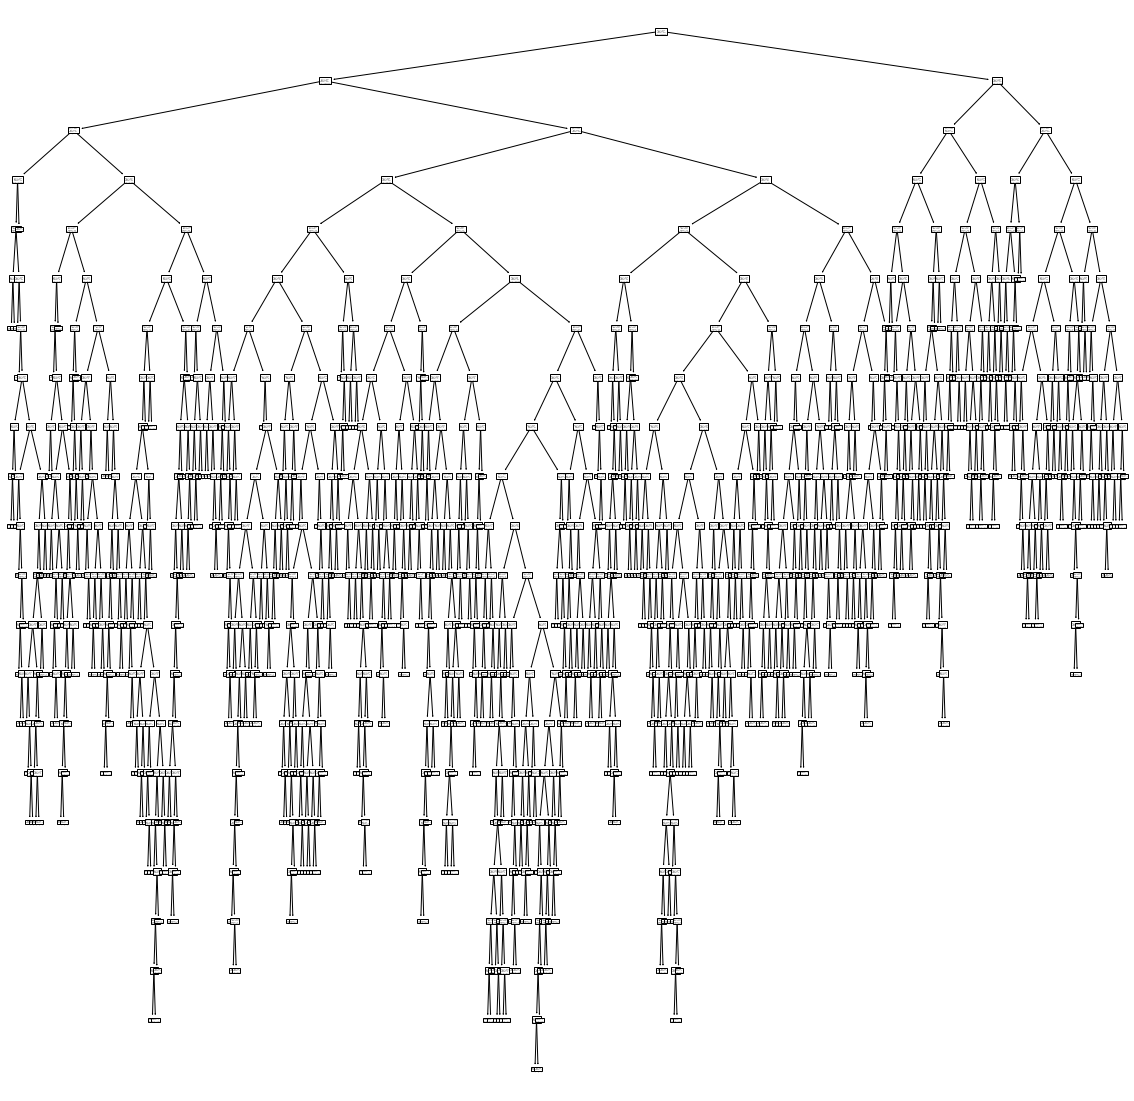

In [10]:
## 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dtc)
plt.show()


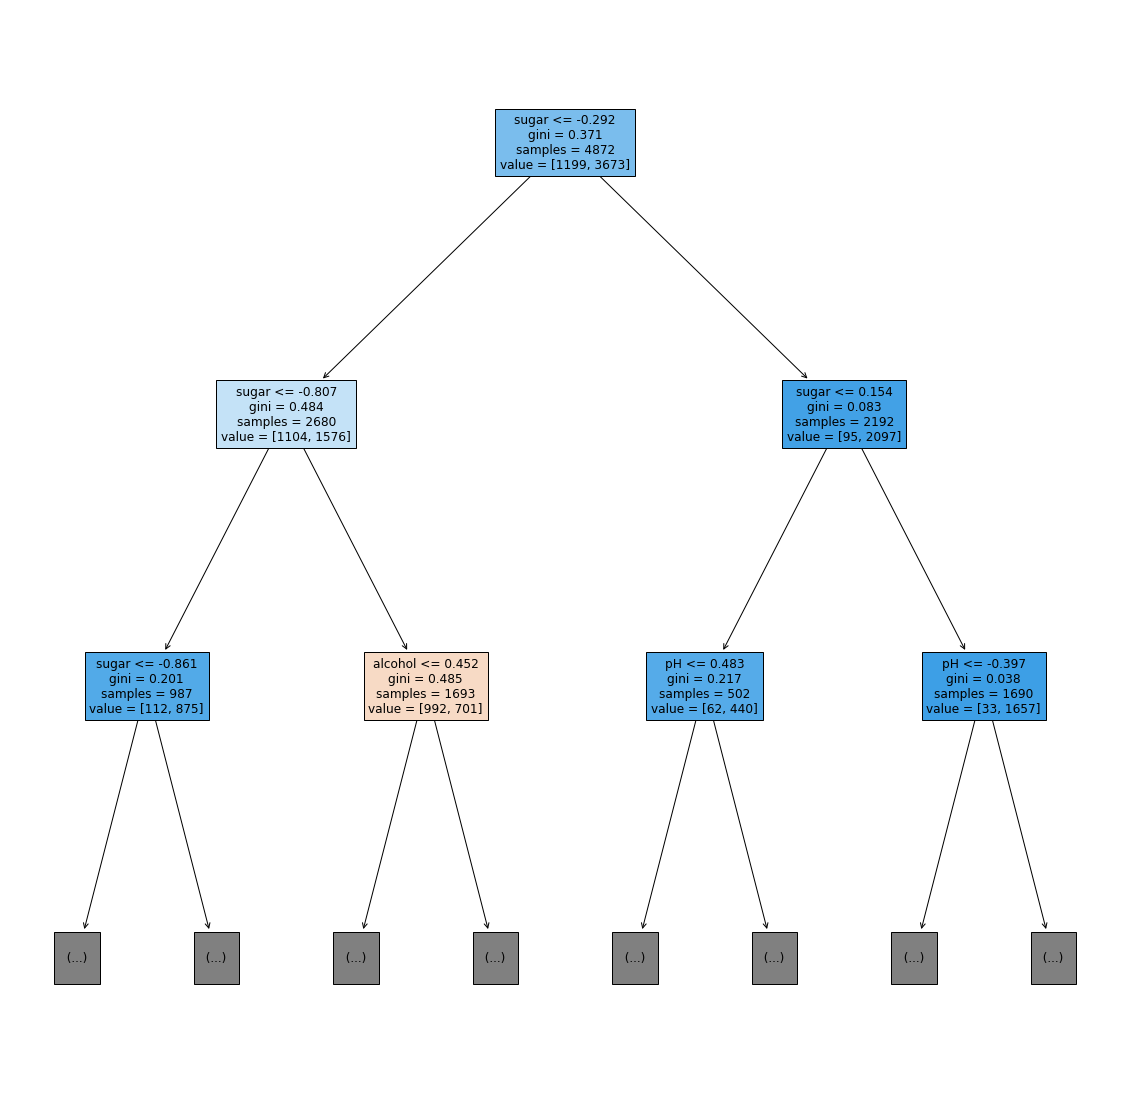

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번째(루트노드)를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름

plt.figure(figsize=(20,20))
plot_tree(dtc, max_depth=2,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# - gini : 불순도
# - samples : 훈련에 사용된 총 데이터 수 
# - value : 범주별로 사용된 데이터 수

# - 가장 첫번째 트리 : 루트노드(root node)
# - 가장 아래 트리 : 리프노드(leaf node)
# - (...) : 훈련을 더 해야한다는 뜻 


## 가지치기
#### - max_depth : 트리의 갯수로 제한
#### - 트리가 너무 뻗어 나가도 정확도가 떨어짐
#### - 제한 없이 뻗어나가는 것을 max_depth로 제어

In [12]:
### max_depth를 3으로 해서 다시 훈련

dtc = DecisionTreeClassifier(max_depth=3,random_state=42)
dtc.fit(train_scaled,train_target)

# 훈련 및 테스트 데이터 정확도 확인하기
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

# [해석]
# 과대적합..! 
# 훈련데이터 정확도 > 테스트 데이터 정확도 

0.8438013136288999
0.8566153846153847


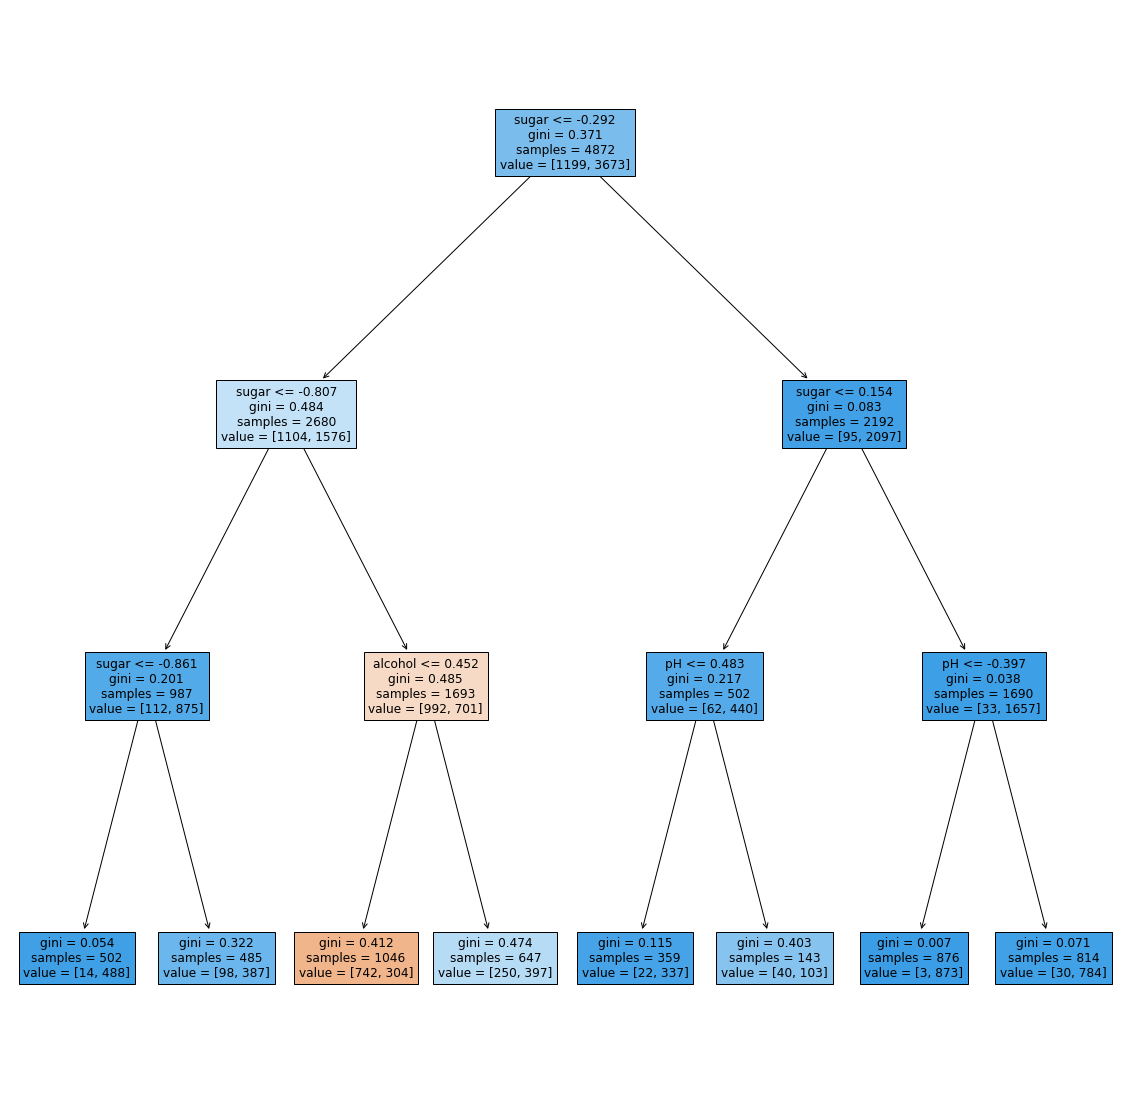

In [13]:
plt.figure(figsize=(20,20))
plot_tree(dtc,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()
# (...) 없으므로 훈련할게 없다 
# sugar로 시작 : 상관관계값 기준으로 선택  (상관관계 큰 값으로)

## 특성중요도
#### :트리훈련에 사용된 독립변수(특성=퓨처)들의 정확도 확인
#### - 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단

In [14]:
print(dtc.feature_importances_)
# [ 알콜 , 당도 , pH] : 당도가 훈련에 영향을 가장 많이 미침 

[0.11527315 0.86993327 0.01479358]


## 독립변수의 갯수를 줄여가면서 훈련/테스트 정확도 비교하기
#### 필요한 독립변수들만 추출해서 정확도를 파악

In [15]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['alcohol','sugar']].to_numpy()
wine_target = wine[['class']].to_numpy()

# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input, wine_target)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled,train_target)
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

훈련-입력 :  (4872, 2)
훈련-타겟 :  (4872, 1)
테스트-입력 :  (1625, 2)
테스트-타겟 : (1625, 1)
0.9254926108374384
0.8295384615384616


In [16]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['alcohol','pH']].to_numpy()
wine_target = wine[['class']].to_numpy()
# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input, wine_target)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled,train_target)
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

훈련-입력 :  (4872, 2)
훈련-타겟 :  (4872, 1)
테스트-입력 :  (1625, 2)
테스트-타겟 : (1625, 1)
0.8795155993431856
0.7286153846153847


In [17]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['sugar','pH']].to_numpy()
wine_target = wine[['class']].to_numpy()
# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input, wine_target)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(max_depth=4,random_state=42)
dtc.fit(train_scaled,train_target)
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

훈련-입력 :  (4872, 2)
훈련-타겟 :  (4872, 1)
테스트-입력 :  (1625, 2)
테스트-타겟 : (1625, 1)
0.8374384236453202
0.8252307692307692


In [18]:
# 독립변수, 종속변수 나누기
# 독립변수 2차원, 종속변수 1차원
wine_input = wine[['alcohol','sugar']].to_numpy()
wine_target = wine[['class']].to_numpy()

# 훈련데이터, 테스트데이터 분류 
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input, wine_target)
print('훈련-입력 : ', train_input.shape)
print('훈련-타겟 : ',train_target.shape)
print('테스트-입력 : ',test_input.shape)
print('테스트-타겟 :',test_target.shape)

# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 스스로 표준점수 생성 
# 타겟 데이터는 절대 정규화 XXXXXX 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled,train_target)
print(dtc.score(train_scaled,train_target))
print(dtc.score(test_scaled,test_target))

훈련-입력 :  (4872, 2)
훈련-타겟 :  (4872, 1)
테스트-입력 :  (1625, 2)
테스트-타겟 : (1625, 1)
0.9213875205254516
0.8363076923076923


In [19]:
## 정답률과 오답률 출력하기
#  (출력 예시) :총 1000% 중 접답률이[84.47%], 오답률이[15.53%]
wine_new = wine[['alcohol','sugar']].to_numpy()
pred_wine = ss.transform(wine_new)
wine['class_pred'] = dtc.predict(train_scaled)
o_cnt = len(wine[wine['class']==wine['class_pred']])
x_cnt = len(wine[wine['class']!=wine['class_pred']])
sum_cnt = len(wine)
print('총 갯수',sum_cnt,'건 중에 정답갯수',o_cnt,'건 오답갯수',x_cnt)
o_p = np.round(o_cnt/sum_cnt *100, 2)
x_p = np.round(x_cnt/sum_cnt *100, 2)
sum_p = np.round(sum_cnt/sum_cnt*100,2)
print('총{}%중 정답률[{}%], 오답률 [{}%]'.format(sum_p,o_p,x_p))

ValueError: Length of values (4872) does not match length of index (6497)

#### - [지금까지 배운 모든 분류모델] 적용해보기
#### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해보기
####   (특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
####   (전체 특성을 모두 적용도 해보세요)
#### - 사용한 모델별로, 예측(predict)을 통한 결과를 ,데이터프레임에 col_predict 컬럼명으로 추가하기

In [ ]:
# [문제] 와인데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측
# ** 특성 이름ㅇ르 담고있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#    - 범주는 'class_0' 과 'class_1'만 사용 ( 0과 1로 변경하여 사용)
#    - (0= 레드와인, 1 = 화이트와인)

# 알콜(Alcohol)
# 말산(Malic acid)
# 회분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 폴라보노이드 폴리페놀(Flavanoids)
# 비 폴라보노이드 폴리페놀(Nonflavanoid phenols)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intensity)
# 
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all)